**$\underline{Error\hspace{0.2cm} of\hspace{0.2cm} Some\hspace{0.2cm} Methods}$**

This is homework done in the course. Comparing the error of some methods, for some specific situations.

Potential energy: $V(x) = x^4 - 2x^2$

Average error: $Err = \displaystyle\sqrt{\frac{1}{N} \sum_{i=0}^{N}(E(t_i) - E(0))^2}$ 

E = Mechanical Energy.


**Question:** Error $\times \Delta t$ for the Velocity-Verlet, RK2 and RK4 algorithms for different values ​​of $\Delta t$ starting from 0.1 and dividing by 2. 

Make the figures in normal, semi-log (x and y) and log-log (four figures) scale to determine which one is the
better representation. The first three figures for 8 values ​​of $\Delta t$ and the log-log for 18.

# Normal Scale Graph

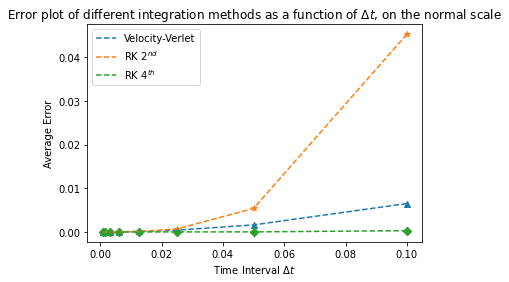

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Common initial conditions:
dt,t,tf = 0.1,0,10 
m = 1 # Particle mass.
q = 1 
T = 0
Q = 8
N = 0

def E(x,v,m): # Energy function that will be used at the beginning to calculate the initial energy.
  E = ((m * v**2)/2) + (x**4 - 2 * x**2)
  return E

# Initial conditions separated by method:

# Velocity-Verlet method:
x1 = -1 # Initial X0.
v1 = 1 # Initial v0.
E1 = 0 # Energy.
E01 = E(x1,v1,m)
erro1,err1 = 0,0 # Error.
list_er1 = []

# 2nd order Runge-Kutta method:
v3,v4 = 1,0
x3,x4 = -1,0
E3 = 0
E03 = E(x3,v3,m)
xaux3 = 0
vaux3 = 0
erro3,err3 = 0,0
list_er3 = []

# 4th order Runge-Kutta method:
v5,v6,v7,v8 = 1,0,0,0
x5,x6,x7,x8 = -1,0,0,0
E5 = 0
E05 = E(x5,v5,m)
xaux5,vaux5 = x5,v5
erro5,err5 = 0,0
list_er5 = []


def a(x):
  a = (-4 * x**3 + 4 * x)/m # Acceleration for this system, with gradU = x^4 - 2x^2 and f = ma = -gradU.
  return a

list_t = [] # dt list.
while T < Q:
    N = 0 # Resetting the N that will be used again in the inside loop. 
    while t < tf:
      
      # Velocity-Verlet:
      v1 = v1 + a(x1) * dt/2 # v(t + dt/2) = v(dt) + a(x(dt)) * dt/2
      x1 = x1 + v1 * dt # x (t + dt) = x(t) + v (t + dt/2) * dt
      v1 = v1 + a(x1) * dt/2 # v(t + dt) = v(t + dt/2) + a(x(t + dt)) * dt/2
      E1 = E(x1,v1,m)
      err1 = err1 + (E1 - E01)**2


      # RK 2:
      xaux3 = x3
      vaux3 = v3
      x3 = x3 + v3 * dt/2 # x(t + dt/2) = x(t) + v(t) * dt/2
      v3 = v3 + a(xaux3) * dt/2 # v(t + dt/2) = v(t) + a(x(t)) * dt/2
      x4 = xaux3 + v3 * dt # x(t + dt) = x(t) + v(t + dt/2) + dt
      E3 = E(xaux3,vaux3,m) # Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      v4 = vaux3 + a(x3) * dt # v(t + dt) = v(t) + a(x(t + dt/2)) + dt
      err3 = err3 + (E3 - E03)**2
      v3 = v4 
      x3 = x4 


      # RK 4:
      E5 = E(xaux5,vaux5,m)# Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      x5 = xaux5 + vaux5 * dt/2 
      v5 = vaux5 + a(xaux5) * dt/2 
      x6 = xaux5 + v5 * dt/2
      v6 = vaux5 + a(x5) * dt/2
      x7 = xaux5 + v6 * dt
      v7 = vaux5 + a(x6) * dt
      x8 = xaux5 + (vaux5 + 2 * v5 + 2 * v6 + v7) * dt/6
      v8 = vaux5 + (a(xaux5) + 2* a(x5) + 2 * a(x6) + a(x7)) * dt/6
      err5 = err5 + (E5 - E05)**2
      vaux5 = v8 
      xaux5 = x8 
      
      t = t + dt # Time passing at every dt.
      N = N + 1 # Number of error steps.
    
    erro1 = (err1/N)**(1/2) # Here we get the value of the error resulting from the inner loop.
    list_er1.append(erro1)
    
    erro3 = (err3/N)**(1/2)
    list_er3.append(erro3)
    
    erro5 = (err5/N)**(1/2)
    list_er5.append(erro5)

    # Resetting the initial values ​​for the next loop inside:
    t = 0
    x1 = -1 
    v1 = 1 
    E1 = 0 
    err1 = 0

    v3,v4 = 1,0
    x3,x4 = -1,0
    E3 = 0
    xaux3 = 0
    vaux3 = 0
    err3 = 0
    
    v5,v6,v7,v8 = 1,0,0,0
    x5,x6,x7,x8 = -1,0,0,0
    E5 = 0
    xaux5,vaux5 = x5,v5
    err5 = 0

    list_t.append(dt)
    dt = dt/2 # Here we take half the value of dt.
    T = T + q # Outer loop count, from T = 0 to Q = 8, from q in q.

plt.plot(list_t,list_er1,linestyle = '--')
plt.scatter(list_t,list_er1,marker = '^') 
plt.plot(list_t,list_er3,linestyle = '--')
plt.scatter(list_t,list_er3,marker = '*')
plt.plot(list_t,list_er5,linestyle = '--')
plt.scatter(list_t,list_er5,marker = 'D')
plt.legend(['Velocity-Verlet','RK $2^{nd}$','RK $4^{th}$'])
plt.ylabel('Average Error')
plt.xlabel('Time Interval $\Delta t$')
plt.title('Error plot of different integration methods as a function of $\Delta t$, on the normal scale')
#plt.savefig('graf1',dpi=300)
plt.show()

#Semi-Log Plot

**x-axis semi-log:**

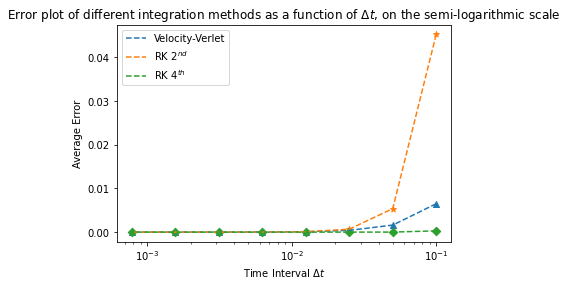

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Common initial conditions:
dt,t,tf = 0.1,0,10 
m = 1 # Particle mass.
q = 1 
T = 0
Q = 8
N = 0

def E(x,v,m): # Energy function that will be used at the beginning to calculate the initial energy.
  E = ((m * v**2)/2) + (x**4 - 2 * x**2)
  return E

# Initial conditions separated by method:

# Velocity-Verlet method:
x1 = -1 # Initial X0.
v1 = 1 # Initial v0.
E1 = 0 # Energy.
E01 = E(x1,v1,m)
erro1,err1 = 0,0 # Error.
list_er1 = []

# 2nd order Runge-Kutta method:
v3,v4 = 1,0
x3,x4 = -1,0
E3 = 0
E03 = E(x3,v3,m)
xaux3 = 0
vaux3 = 0
erro3,err3 = 0,0
list_er3 = []

# 4th order Runge-Kutta method:
v5,v6,v7,v8 = 1,0,0,0
x5,x6,x7,x8 = -1,0,0,0
E5 = 0
E05 = E(x5,v5,m)
xaux5,vaux5 = x5,v5
erro5,err5 = 0,0
list_er5 = []


def a(x):
  a = (-4 * x**3 + 4 * x)/m # Acceleration for this system, with gradU = x^4 - 2x^2 and f = ma = -gradU.
  return a

list_t = [] # dt list.
while T < Q:
    N = 0 # Resetting the N that will be used again in the inside loop. 
    while t < tf:
      
      # Velocity-Verlet:
      v1 = v1 + a(x1) * dt/2 # v(t + dt/2) = v(dt) + a(x(dt)) * dt/2
      x1 = x1 + v1 * dt # x (t + dt) = x(t) + v (t + dt/2) * dt
      v1 = v1 + a(x1) * dt/2 # v(t + dt) = v(t + dt/2) + a(x(t + dt)) * dt/2
      E1 = E(x1,v1,m)
      err1 = err1 + (E1 - E01)**2


      # RK 2:
      xaux3 = x3
      vaux3 = v3
      x3 = x3 + v3 * dt/2 # x(t + dt/2) = x(t) + v(t) * dt/2
      v3 = v3 + a(xaux3) * dt/2 # v(t + dt/2) = v(t) + a(x(t)) * dt/2
      x4 = xaux3 + v3 * dt # x(t + dt) = x(t) + v(t + dt/2) + dt
      E3 = E(xaux3,vaux3,m) # Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      v4 = vaux3 + a(x3) * dt # v(t + dt) = v(t) + a(x(t + dt/2)) + dt
      err3 = err3 + (E3 - E03)**2
      v3 = v4 
      x3 = x4 


      # RK 4:
      E5 = E(xaux5,vaux5,m)# Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      x5 = xaux5 + vaux5 * dt/2 
      v5 = vaux5 + a(xaux5) * dt/2 
      x6 = xaux5 + v5 * dt/2
      v6 = vaux5 + a(x5) * dt/2
      x7 = xaux5 + v6 * dt
      v7 = vaux5 + a(x6) * dt
      x8 = xaux5 + (vaux5 + 2 * v5 + 2 * v6 + v7) * dt/6
      v8 = vaux5 + (a(xaux5) + 2* a(x5) + 2 * a(x6) + a(x7)) * dt/6
      err5 = err5 + (E5 - E05)**2
      vaux5 = v8 
      xaux5 = x8 
      
      t = t + dt # Time passing at every dt.
      N = N + 1 # Number of error steps.
    
    erro1 = (err1/N)**(1/2) # Here we get the value of the error resulting from the inner loop.
    list_er1.append(erro1)
    
    erro3 = (err3/N)**(1/2)
    list_er3.append(erro3)
    
    erro5 = (err5/N)**(1/2)
    list_er5.append(erro5)

    # Resetting the initial values ​​for the next loop inside:
    t = 0
    x1 = -1 
    v1 = 1 
    E1 = 0 
    err1 = 0

    v3,v4 = 1,0
    x3,x4 = -1,0
    E3 = 0
    xaux3 = 0
    vaux3 = 0
    err3 = 0
    
    v5,v6,v7,v8 = 1,0,0,0
    x5,x6,x7,x8 = -1,0,0,0
    E5 = 0
    xaux5,vaux5 = x5,v5
    err5 = 0

    list_t.append(dt)
    dt = dt/2 # Here we take half the value of dt.
    T = T + q # Outer loop count, from T = 0 to Q = 8, from q in q.

plt.semilogx(list_t,list_er1,linestyle = '--')
plt.scatter(list_t,list_er1,marker = '^') 
plt.semilogx(list_t,list_er3,linestyle = '--')
plt.scatter(list_t,list_er3,marker = '*')
plt.semilogx(list_t,list_er5,linestyle = '--')
plt.scatter(list_t,list_er5,marker = 'D')
plt.legend(['Velocity-Verlet','RK $2^{nd}$','RK $4^{th}$'])
plt.ylabel('Average Error')
plt.xlabel('Time Interval $\Delta t$')
plt.title('Error plot of different integration methods as a function of $\Delta t$, on the semi-logarithmic scale')
#plt.savefig('graf2',dpi=300)
plt.show()

**y-axis semi-log:**

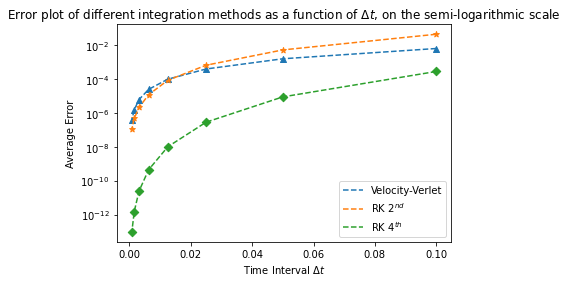

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Common initial conditions:
dt,t,tf = 0.1,0,10 
m = 1 # Particle mass.
q = 1 
T = 0
Q = 8
N = 0

def E(x,v,m): # Energy function that will be used at the beginning to calculate the initial energy.
  E = ((m * v**2)/2) + (x**4 - 2 * x**2)
  return E

# Initial conditions separated by method:

# Velocity-Verlet method:
x1 = -1 # Initial X0.
v1 = 1 # Initial v0.
E1 = 0 # Energy.
E01 = E(x1,v1,m)
erro1,err1 = 0,0 # Error.
list_er1 = []

# 2nd order Runge-Kutta method:
v3,v4 = 1,0
x3,x4 = -1,0
E3 = 0
E03 = E(x3,v3,m)
xaux3 = 0
vaux3 = 0
erro3,err3 = 0,0
list_er3 = []

# 4th order Runge-Kutta method:
v5,v6,v7,v8 = 1,0,0,0
x5,x6,x7,x8 = -1,0,0,0
E5 = 0
E05 = E(x5,v5,m)
xaux5,vaux5 = x5,v5
erro5,err5 = 0,0
list_er5 = []


def a(x):
  a = (-4 * x**3 + 4 * x)/m # Acceleration for this system, with gradU = x^4 - 2x^2 and f = ma = -gradU.
  return a

list_t = [] # dt list.
while T < Q:
    N = 0 # Resetting the N that will be used again in the inside loop. 
    while t < tf:
      
      # Velocity-Verlet:
      v1 = v1 + a(x1) * dt/2 # v(t + dt/2) = v(dt) + a(x(dt)) * dt/2
      x1 = x1 + v1 * dt # x (t + dt) = x(t) + v (t + dt/2) * dt
      v1 = v1 + a(x1) * dt/2 # v(t + dt) = v(t + dt/2) + a(x(t + dt)) * dt/2
      E1 = E(x1,v1,m)
      err1 = err1 + (E1 - E01)**2


      # RK 2:
      xaux3 = x3
      vaux3 = v3
      x3 = x3 + v3 * dt/2 # x(t + dt/2) = x(t) + v(t) * dt/2
      v3 = v3 + a(xaux3) * dt/2 # v(t + dt/2) = v(t) + a(x(t)) * dt/2
      x4 = xaux3 + v3 * dt # x(t + dt) = x(t) + v(t + dt/2) + dt
      E3 = E(xaux3,vaux3,m) # Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      v4 = vaux3 + a(x3) * dt # v(t + dt) = v(t) + a(x(t + dt/2)) + dt
      err3 = err3 + (E3 - E03)**2
      v3 = v4 
      x3 = x4 


      # RK 4:
      E5 = E(xaux5,vaux5,m)# Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      x5 = xaux5 + vaux5 * dt/2 
      v5 = vaux5 + a(xaux5) * dt/2 
      x6 = xaux5 + v5 * dt/2
      v6 = vaux5 + a(x5) * dt/2
      x7 = xaux5 + v6 * dt
      v7 = vaux5 + a(x6) * dt
      x8 = xaux5 + (vaux5 + 2 * v5 + 2 * v6 + v7) * dt/6
      v8 = vaux5 + (a(xaux5) + 2* a(x5) + 2 * a(x6) + a(x7)) * dt/6
      err5 = err5 + (E5 - E05)**2
      vaux5 = v8 
      xaux5 = x8 
      
      t = t + dt # Time passing at every dt.
      N = N + 1 # Number of error steps.
    
    erro1 = (err1/N)**(1/2) # Here we get the value of the error resulting from the inner loop.
    list_er1.append(erro1)
    
    erro3 = (err3/N)**(1/2)
    list_er3.append(erro3)
    
    erro5 = (err5/N)**(1/2)
    list_er5.append(erro5)

    # Resetting the initial values ​​for the next loop inside:
    t = 0
    x1 = -1 
    v1 = 1 
    E1 = 0 
    err1 = 0

    v3,v4 = 1,0
    x3,x4 = -1,0
    E3 = 0
    xaux3 = 0
    vaux3 = 0
    err3 = 0
    
    v5,v6,v7,v8 = 1,0,0,0
    x5,x6,x7,x8 = -1,0,0,0
    E5 = 0
    xaux5,vaux5 = x5,v5
    err5 = 0

    list_t.append(dt)
    dt = dt/2 # Here we take half the value of dt.
    T = T + q # Outer loop count, from T = 0 to Q = 8, from q in q.


plt.semilogy(list_t,list_er1,linestyle = '--')
plt.scatter(list_t,list_er1,marker = '^') 
plt.semilogy(list_t,list_er3,linestyle = '--')
plt.scatter(list_t,list_er3,marker = '*')
plt.semilogy(list_t,list_er5,linestyle = '--')
plt.scatter(list_t,list_er5,marker = 'D')
plt.legend(['Velocity-Verlet','RK $2^{nd}$','RK $4^{th}$'])
plt.ylabel('Average Error')
plt.xlabel('Time Interval $\Delta t$')
plt.title('Error plot of different integration methods as a function of $\Delta t$, on the semi-logarithmic scale')
#plt.savefig('graf3',dpi=300)
plt.show()

#Log-Log Scale Graph

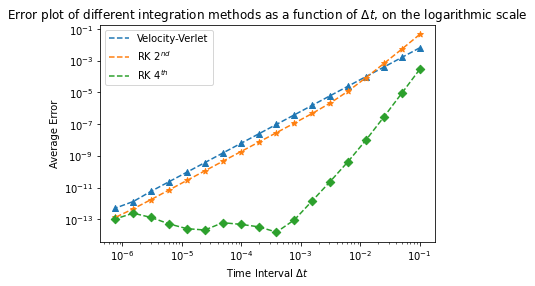

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Common initial conditions:
dt,t,tf = 0.1,0,10 
m = 1 # Particle mass.
q = 1 
T = 0
Q = 18
N = 0

def E(x,v,m): # Energy function that will be used at the beginning to calculate the initial energy.
  E = ((m * v**2)/2) + (x**4 - 2 * x**2)
  return E

# Initial conditions separated by method:

# Velocity-Verlet method:
x1 = -1 # Initial X0.
v1 = 1 # Initial v0.
E1 = 0 # Energy.
E01 = E(x1,v1,m)
erro1,err1 = 0,0 # Error.
list_er1 = []

# 2nd order Runge-Kutta method:
v3,v4 = 1,0
x3,x4 = -1,0
E3 = 0
E03 = E(x3,v3,m)
xaux3 = 0
vaux3 = 0
erro3,err3 = 0,0
list_er3 = []

# 4th order Runge-Kutta method:
v5,v6,v7,v8 = 1,0,0,0
x5,x6,x7,x8 = -1,0,0,0
E5 = 0
E05 = E(x5,v5,m)
xaux5,vaux5 = x5,v5
erro5,err5 = 0,0
list_er5 = []

def a(x):
  a = (-4 * x**3 + 4 * x)/m # Acceleration for this system, with gradU = x^4 - 2x^2 and f = ma = -gradU.
  return a

list_t = [] # dt list.
while T < Q:
    N = 0 # Resetting the N that will be used again in the inside loop. 
    while t < tf:
      
      # Velocity-Verlet:
      v1 = v1 + a(x1) * dt/2 # v(t + dt/2) = v(dt) + a(x(dt)) * dt/2
      x1 = x1 + v1 * dt # x (t + dt) = x(t) + v (t + dt/2) * dt
      v1 = v1 + a(x1) * dt/2 # v(t + dt) = v(t + dt/2) + a(x(t + dt)) * dt/2
      E1 = E(x1,v1,m)
      err1 = err1 + (E1 - E01)**2


      # RK 2:
      xaux3 = x3
      vaux3 = v3
      x3 = x3 + v3 * dt/2 # x(t + dt/2) = x(t) + v(t) * dt/2
      v3 = v3 + a(xaux3) * dt/2 # v(t + dt/2) = v(t) + a(x(t)) * dt/2
      x4 = xaux3 + v3 * dt # x(t + dt) = x(t) + v(t + dt/2) + dt
      E3 = E(xaux3,vaux3,m) # Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      v4 = vaux3 + a(x3) * dt # v(t + dt) = v(t) + a(x(t + dt/2)) + dt
      err3 = err3 + (E3 - E03)**2
      v3 = v4 
      x3 = x4 


      # RK 4:
      E5 = E(xaux5,vaux5,m)# Energy after being calculated, but it is calculated with the initial parameters of that part of the loop.
      x5 = xaux5 + vaux5 * dt/2 
      v5 = vaux5 + a(xaux5) * dt/2 
      x6 = xaux5 + v5 * dt/2
      v6 = vaux5 + a(x5) * dt/2
      x7 = xaux5 + v6 * dt
      v7 = vaux5 + a(x6) * dt
      x8 = xaux5 + (vaux5 + 2 * v5 + 2 * v6 + v7) * dt/6
      v8 = vaux5 + (a(xaux5) + 2* a(x5) + 2 * a(x6) + a(x7)) * dt/6
      err5 = err5 + (E5 - E05)**2
      vaux5 = v8 
      xaux5 = x8 
      
      t = t + dt # Time passing at every dt.
      N = N + 1 # Number of error steps.
    
    erro1 = (err1/N)**(1/2) # Here we get the value of the error resulting from the inner loop.
    list_er1.append(erro1)
    
    erro3 = (err3/N)**(1/2)
    list_er3.append(erro3)
    
    erro5 = (err5/N)**(1/2)
    list_er5.append(erro5)

    # Resetting the initial values ​​for the next loop inside:
    t = 0
    x1 = -1 
    v1 = 1 
    E1 = 0 
    err1 = 0

    v3,v4 = 1,0
    x3,x4 = -1,0
    E3 = 0
    xaux3 = 0
    vaux3 = 0
    err3 = 0
    
    v5,v6,v7,v8 = 1,0,0,0
    x5,x6,x7,x8 = -1,0,0,0
    E5 = 0
    xaux5,vaux5 = x5,v5
    err5 = 0

    list_t.append(dt)
    dt = dt/2 # Here we take half the value of dt.
    T = T + q # Outer loop count, from T = 0 to Q = 8, from q in q.


plt.loglog(list_t,list_er1,linestyle = '--')
plt.scatter(list_t,list_er1,marker = '^') 
plt.loglog(list_t,list_er3,linestyle = '--')
plt.scatter(list_t,list_er3,marker = '*')
plt.loglog(list_t,list_er5,linestyle = '--')
plt.scatter(list_t,list_er5,marker = 'D')
plt.legend(['Velocity-Verlet','RK $2^{nd}$','RK $4^{th}$'])
plt.ylabel('Average Error')
plt.xlabel('Time Interval $\Delta t$')
plt.title('Error plot of different integration methods as a function of $\Delta t$, on the logarithmic scale')
#plt.savefig('graf4',dpi=300)
plt.show()